In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [146]:
f = open('an-dao.json', encoding="utf8")

data = json.load(f)

## Read the data in json

In [58]:
# print(json.dumps(data, indent = 4, sort_keys=True))

In [147]:
def flatten_json(nested_json: dict, exclude: list=[''], sep: str='_') -> dict:
    """
    Flatten a list of nested dicts.
    """
    out = dict()
    def flatten(x: (list, dict, str), name: str='', exclude=exclude):
        if type(x) is dict:
            for a in x:
                if a not in exclude:
                    flatten(x[a], f'{name}{a}{sep}')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, f'{name}{i}{sep}')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out
#https://stackoverflow.com/questions/58442723/how-to-flatten-a-nested-json-recursively-with-flatten-json

In [148]:
# list to add dataframe from each file
df_list = list()

# # iterate through files
# for file in files:
#     with open(file, 'r', encoding='utf-8') as f:

#         # read with json
#         data = json.loads(f.read())

        # flatten_json into a dataframe and add to the dataframe list
df_list.append(pd.DataFrame.from_dict(flatten_json(data), orient='index').T)
        
# concat all dataframes together
df_ = pd.concat(df_list).reset_index(drop=True)

In [149]:
df_=df_.T
df_=df_.reset_index()
df_.columns =['field', 'value']
df_.head(15)

,field,value
0,data_organization_workspaces_0_id,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,data_organization_workspaces_0_slug,dtech-guild
2,data_organization_workspaces_0_name,dTech Guild
3,data_organization_workspaces_0_createdAt,2022-03-18T16:29:01.423Z
4,data_organization_workspaces_1_id,eadc2630-1aaa-4734-88d4-f602fa4a7b9a
5,data_organization_workspaces_1_slug,operations-guild
6,data_organization_workspaces_1_name,Operations Guild
7,data_organization_workspaces_1_createdAt,2022-05-04T17:55:33.135Z
8,data_organization_workspaces_2_id,581f67b0-3279-4ac0-9276-28e9d615fcad
9,data_organization_workspaces_2_slug,test-office-hours


In [150]:
df_['type1'] = df_['field'].str.split('_').str[0]
df_['type2'] = df_['field'].str.split('_').str[1]
df_['type3'] = df_['field'].str.split('_').str[2]
df_['project_num'] = df_['field'].str.split('_').str[3]
df_['tasks'] = df_['field'].str.split('_').str[4]
df_['task_num'] = df_['field'].str.split('_').str[5]
df_['detail1'] = df_['field'].str.split('_').str[6]
df_['detail1_num'] = df_['field'].str.split('_').str[7]
df_['detail2'] = df_['field'].str.split('_').str[8]
df_['detail2_num'] = df_['field'].str.split('_').str[9]
df_['detail3'] = df_['field'].str.split('_').str[10]

df_ = df_[['type3', 'project_num', 'tasks', 'task_num', 'detail1', 'detail1_num', 'detail2', 'detail2_num', 'detail3', 'value']]
df_.head(50)

,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
0,workspaces,0,id,NaN,NaN,NaN,NaN,NaN,NaN,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,workspaces,0,slug,NaN,NaN,NaN,NaN,NaN,NaN,dtech-guild
2,workspaces,0,name,NaN,NaN,NaN,NaN,NaN,NaN,dTech Guild
3,workspaces,0,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-18T16:29:01.423Z
4,workspaces,1,id,NaN,NaN,NaN,NaN,NaN,NaN,eadc2630-1aaa-4734-88d4-f602fa4a7b9a
5,workspaces,1,slug,NaN,NaN,NaN,NaN,NaN,NaN,operations-guild
6,workspaces,1,name,NaN,NaN,NaN,NaN,NaN,NaN,Operations Guild
7,workspaces,1,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-04T17:55:33.135Z
8,workspaces,2,id,NaN,NaN,NaN,NaN,NaN,NaN,581f67b0-3279-4ac0-9276-28e9d615fcad
9,workspaces,2,slug,NaN,NaN,NaN,NaN,NaN,NaN,test-office-hours


In [ ]:
# df1.to_csv('test1.csv')

In [ ]:
# df.info()

In [ ]:
# cond_1 = df['field'].str.contains("workspaces", case=False) == "True"
# cond_2 = df['field'].str.contains("workspaces", case=False) == "False"
# df['column_new'] = np.select([cond_1, cond_2], [df['field'].str[:28], df['field'].str[:26]], 'Other')


In [ ]:
# def new_value(column_1):
#     print(column_1)
# #     if column_1.str.contains("workspaces", case=False) == "True":
#     if "workspaces" in column_1:
#         return column_1[:28]
#     else:
#         return column_1[:26]

# df['type'] = df.apply(lambda row: new_value(row.field), axis = 1)

In [151]:
print(len(df_))
df_.head()

3246


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
0,workspaces,0,id,NaN,NaN,NaN,NaN,NaN,NaN,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,workspaces,0,slug,NaN,NaN,NaN,NaN,NaN,NaN,dtech-guild
2,workspaces,0,name,NaN,NaN,NaN,NaN,NaN,NaN,dTech Guild
3,workspaces,0,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-18T16:29:01.423Z
4,workspaces,1,id,NaN,NaN,NaN,NaN,NaN,NaN,eadc2630-1aaa-4734-88d4-f602fa4a7b9a


### Remove Season 0 bounties as they were all tests before Aragon really started using DeWork

In [153]:
df= df_[~((df_['type3']=='projects')&(df_['project_num']=='0'))]
print(len(df))
df.head(20)

3123


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
0,workspaces,0,id,NaN,NaN,NaN,NaN,NaN,NaN,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,workspaces,0,slug,NaN,NaN,NaN,NaN,NaN,NaN,dtech-guild
2,workspaces,0,name,NaN,NaN,NaN,NaN,NaN,NaN,dTech Guild
3,workspaces,0,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-18T16:29:01.423Z
4,workspaces,1,id,NaN,NaN,NaN,NaN,NaN,NaN,eadc2630-1aaa-4734-88d4-f602fa4a7b9a
5,workspaces,1,slug,NaN,NaN,NaN,NaN,NaN,NaN,operations-guild
6,workspaces,1,name,NaN,NaN,NaN,NaN,NaN,NaN,Operations Guild
7,workspaces,1,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-04T17:55:33.135Z
8,workspaces,2,id,NaN,NaN,NaN,NaN,NaN,NaN,581f67b0-3279-4ac0-9276-28e9d615fcad
9,workspaces,2,slug,NaN,NaN,NaN,NaN,NaN,NaN,test-office-hours


In [154]:
len(df_)-len(df)

123

## Available data
Num of project
Num of tasks within a project
Name of tasks
Owner of tasks
Assinees for tasks (can be more than one)


### Participating Guilds

In [155]:
print(df[(df['type3']=='workspaces') & (df['tasks']=='name')].value.unique())

['dTech Guild' 'Operations Guild' 'People Guild']


### Number of Projects & Number of Tasks in a Project

In [156]:
numof_projects = len(df[(df['type3']=='projects')]['project_num'].unique())
print('Number of projects :',numof_projects)

Number of projects : 7


In [158]:
done1 = df[(df['detail1']=='status') & (df['value']=='DONE')]

print('Number of completed tasks :',len(done1)) 

# not all completed projects have a doneAt timestamp
# done = df[(df['detail1']=='doneAt') & (df['value'].notnull())]
# len(done)


Number of completed tasks : 36


In [159]:
# project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value']

print('Unique owners count:',len(df[(df['detail1']=='owners') & (df['detail2']=='username')].value.unique()))
print('Unique owners:',df[(df['detail1']=='owners') & (df['detail2']=='username')].value.unique())
print('')
print('Count of tasks per owners:',df[(df['detail1']=='owners') & (df['detail2']=='username')].value.value_counts())

Unique owners count: 14
Unique owners: ['Anukriti' 'lion917' 'luizfernando' 'Aclay' 'Joey C | Aragon.org - OOO'
 'shawnzywonzie' 'b3n1' 'Ivan | AN1' 'ricktik6' 'FMurphy' 'DeFiniTed'
 'Spectra CryptoVerse' 'Carla78' 'barukimang']

Count of tasks per owners: Anukriti                     29
lion917                      15
luizfernando                 11
Aclay                        10
DeFiniTed                    10
ricktik6                      6
shawnzywonzie                 3
b3n1                          2
FMurphy                       2
Carla78                       2
barukimang                    2
Joey C | Aragon.org - OOO     1
Ivan | AN1                    1
Spectra CryptoVerse           1
Name: value, dtype: int64


### Uniqie Contributors

In [160]:
print('Unique assignees count:',len(df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.unique()))
print('Unique assignees :',df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.unique())
print('')
print('Count of tasks per assignee :',df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.value_counts())

Unique assignees count: 22
Unique assignees : ['Anukriti' 'lion917' 'ricktik6' 'Elaheh' 'FMurphy' 'Aclay' 'chidi'
 'Igor MD' 'Openlake' 'callsense' 'Evgeniya4V' 'Baseballbatman'
 'Burber.Sergiy' 'supermaria' 'Romko' 'korzhon' 'DUMBRED' 'Azub' 'Fabs'
 'ifun' 'SoulGenesis' 'aakansha.eth']

Count of tasks per assignee : lion917           20
Anukriti          15
ricktik6          10
Aclay              3
Elaheh             2
FMurphy            2
Romko              1
SoulGenesis        1
ifun               1
Fabs               1
Azub               1
DUMBRED            1
korzhon            1
Baseballbatman     1
supermaria         1
Burber.Sergiy      1
Evgeniya4V         1
callsense          1
Openlake           1
Igor MD            1
chidi              1
aakansha.eth       1
Name: value, dtype: int64


In [161]:
print('Name of tasks :')
df[df['detail1']=='name'].value

Name of tasks :


141                 Onboard New Contributors to Ops Guild
168                                     EOM Report to ESD
188                              Discord Feedback Session
211                                  Notion Jam Session 3
234                             Create a TLDR for the DAO
254                       Design Reporting AN DAO System 
283                                 Post Ukraine Bounties
302            Talk to Julia and Sammie for Data Bounties
321                    Develop best practices with AN DAO
343                            Work with Rick: Reporting 
377                           Interview Bounty Applicants
405      Bounties posted on DeWork - Ops, Finance, Growth
426        Create a Template/Guidelines for a Guild Page 
449                    Merge Handbook Content with Notion
472       Make Who's Who Database Automatically Updatable
507               In-Depth Analysis of Notion Spreadsheet
530                   Centralise Meetings (Tactical Page)
558           

In [162]:
print('Reward amounts :')
df[(df['detail1']=='rewards') & (df['detail2']=='amount')]
# df.loc[(df['detail1']=='rewards') & (df['detail2']=='amount')].value -- just the amount

Reward amounts :


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
897,projects,3,tasks,0,rewards,0,amount,NaN,NaN,300000000
943,projects,3,tasks,1,rewards,0,amount,NaN,NaN,300000000
966,projects,3,tasks,2,rewards,0,amount,NaN,NaN,300000000
989,projects,3,tasks,3,rewards,0,amount,NaN,NaN,300000000
1010,projects,3,tasks,4,rewards,0,amount,NaN,NaN,400000000
1097,projects,3,tasks,5,rewards,0,amount,NaN,NaN,400000000
1152,projects,3,tasks,6,rewards,0,amount,NaN,NaN,200000000
1265,projects,3,tasks,7,rewards,0,amount,NaN,NaN,200000000
1367,projects,3,tasks,8,rewards,0,amount,NaN,NaN,200000000
1513,projects,3,tasks,9,rewards,0,amount,NaN,NaN,200000000


In [163]:
df.loc[(df['type3']=='projects') & (df['project_num']=='3') &
       (df['detail1']=='rewards') & (df['detail2']=='amount')].value.astype('int').sum()/1000000

7360.0

In [164]:
df.loc[(df['type3']=='projects') & (df['project_num']=='4') &
       (df['detail1']=='rewards') & (df['detail2']=='amount')].value.astype('int').sum()/1000000

1200.0

In [165]:
df.loc[(df['type3']=='projects') & (df['project_num']=='5') &
       (df['detail1']=='rewards') & (df['detail2']=='amount')].value.astype('int').sum()/1000000

1100.0

### Projects/Tasks Statues, Assignees (Contributors), Rewards, etc.

In [167]:
numof_projects = len(df[(df['type3']=='projects')]['project_num'].unique())
print('numof_projects:', numof_projects)


for j in range(numof_projects):
    print('')
    print('project_num :', j)
    print('project_name :',df[(df['type3']=='projects')&(df['project_num']==str(j+1))&(df['tasks']=='name')]['value'].values[0])
    print('number of tasks in project :',len(df[(df['type3']=='projects')&(df['project_num']==str(j))&(df['tasks']=='tasks')]['task_num'].unique()))
#     print('    task status :', project[(project['tasks']=='tasks')&(df['task_num']==str(j))&(df['detail1']=='status')]['value'])
    project = df[(df['type3']=='projects')&(df['project_num']==str(j))]
    numof_project_tasks = len(project[(project['tasks']=='tasks')]['task_num'].unique())

        
print('')

numof_projects: 7

project_num : 0
project_name : Ops Management Tasks
number of tasks in project : 0

project_num : 1
project_name : Growth Squad Tasks
number of tasks in project : 28

project_num : 2
project_name : Operations Guild's Bounties
number of tasks in project : 1

project_num : 3
project_name : dTech Open bounties
number of tasks in project : 19

project_num : 4
project_name : Finance Squad Bounties
number of tasks in project : 2

project_num : 5
project_name : Office Hours Test
number of tasks in project : 10

project_num : 6
project_name : Community Experience Squad Open Bounties
number of tasks in project : 0



In [168]:
numof_projects = len(df[(df['type3']=='projects')]['project_num'].unique())
print('numof_projects:', numof_projects)
time_to_completion = []

for j in range(numof_projects):
    print('')
    print('project_num :', j)
    print('project_name :',df[(df['type3']=='projects')&(df['project_num']==str(j+1))&(df['tasks']=='name')]['value'].values[0])
    print('number of tasks in project :',len(df[(df['type3']=='projects')&(df['project_num']==str(j))&(df['tasks']=='tasks')]['task_num'].unique()))

    project = df[(df['type3']=='projects')&(df['project_num']==str(j))]
    numof_project_tasks = len(project[(project['tasks']=='tasks')]['task_num'].unique())
    
    done_status = []


    for i in range(numof_project_tasks):
        print('')
        print('    task number :', i)
        print('    task name :', project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='name')]['value'].values[0])
        task_status = project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='status')]['value'].values[0]
        print('    task status :', task_status)
        if task_status == "DONE":
            done_status.append(task_status)
        start = pd.to_datetime(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='createdAt')]['value'].values[0])
        end = pd.to_datetime(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='doneAt')]['value'].values[0])        
        print('    task created time :', start)
        print('    task done time :', end)
        if end is not None:
            completion = end - start
            time_to_completion.append(completion.days)
            print('    time to completion:', completion)
        else:
            print ('    time to completion not defined')
        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value'].empty:
            print('    task owner :', project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value'].values[0])
        else:
            print ('    task owner not defined')

        multiple_assignees = project[(project['tasks']=='tasks')&(df['task_num']==str(i))
                             &(df['detail1']=='assignees')]['detail1_num'].unique()

        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='assignees')&(df['detail2']=='username')]['value'].empty:
            assignees_list = []
            for k in multiple_assignees:
                assignees = project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='assignees')
                              &(df['detail1_num']==str(k))&(df['detail2']=='username')]['value'].values[0]
                assignees_list.append(assignees)
            print('    task assignees :', assignees_list)
        else:
            print ('    task assignees not defined')
                  
        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='rewards')&(df['detail2']=='amount')]['value'].empty:
            print('    task rewards :', int(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='rewards')&(df['detail2']=='amount')]['value'].values[0])/1000000)
        else:
            print ('    task rewards not defined')             
            
    print('')
    print('number of DONE tasks in project :',len(done_status))
        
print('')

numof_projects: 7

project_num : 0
project_name : Ops Management Tasks
number of tasks in project : 0

number of DONE tasks in project : 0

project_num : 1
project_name : Growth Squad Tasks
number of tasks in project : 28

    task number : 0
    task name : Onboard New Contributors to Ops Guild
    task status : TODO
    task created time : 2022-06-01 02:02:43.268000+00:00
    task done time : None
    time to completion not defined
    task owner : Anukriti
    task assignees : ['Anukriti', 'lion917']
    task rewards not defined

    task number : 1
    task name : EOM Report to ESD
    task status : TODO
    task created time : 2022-06-01 02:01:49.519000+00:00
    task done time : None
    time to completion not defined
    task owner : Anukriti
    task assignees : ['Anukriti']
    task rewards not defined

    task number : 2
    task name : Discord Feedback Session
    task status : DONE
    task created time : 2022-05-31 08:53:49.048000+00:00
    task done time : 2022-05-31 08:

    task owner : Anukriti
    task assignees : ['FMurphy']
    task rewards not defined

    task number : 25
    task name : Bounty Information - Finance and Treasury
    task status : DONE
    task created time : 2022-05-09 22:09:35.790000+00:00
    task done time : 2022-05-16 15:35:40.732000+00:00
    time to completion: 6 days 17:26:04.942000
    task owner : Anukriti
    task assignees : ['Aclay', 'ricktik6']
    task rewards not defined

    task number : 26
    task name : Bounty Board Submission Form
    task status : DONE
    task created time : 2022-05-09 22:08:44.834000+00:00
    task done time : 2022-05-14 22:55:50.676000+00:00
    time to completion: 5 days 00:47:05.842000
    task owner : Anukriti
    task assignees : ['Anukriti', 'lion917']
    task rewards not defined

    task number : 27
    task name : Bounty Board Management - Notion
    task status : DONE
    task created time : 2022-05-09 22:03:01.211000+00:00
    task done time : 2022-05-17 17:37:16.919000+00:00


    task created time : 2022-05-17 16:01:31.397000+00:00
    task done time : None
    time to completion not defined
    task owner : Carla78
    task assignees : ['SoulGenesis']
    task rewards : 600.0

    task number : 1
    task name : Community review Tech Doc. III Part Dev. (CLI) 1/2 (DTG.P2.M5.N2)
    task status : IN_PROGRESS
    task created time : 2022-05-17 16:00:35.192000+00:00
    task done time : None
    time to completion not defined
    task owner : Carla78
    task assignees : ['aakansha.eth']
    task rewards : 600.0

number of DONE tasks in project : 0

project_num : 5
project_name : Office Hours Test
number of tasks in project : 10

    task number : 0
    task name : 10% ANT split
    task status : DONE
    task created time : 2022-05-27 10:47:54.974000+00:00
    task done time : 2022-05-27 10:48:59.033000+00:00
    time to completion: 0 days 00:01:04.059000
    task owner : ricktik6
    task assignees : ['ricktik6']
    task rewards : 10.0

    task number : 1


In [169]:
print(time_to_completion)
time_to_completion_ = [int(0) if item == int(-1) else item for item in time_to_completion]
print(time_to_completion_)


[0, -1, 6, 6, 6, 0, 8, 8, 1, 19, 5, 16, 7, 21, 6, 6, 5, 7, 9, 9, 10, 7, 9, 9, 9, 10, 7, 9, 0, 0, 0, 2, 1, 2]
[0, 0, 6, 6, 6, 0, 8, 8, 1, 19, 5, 16, 7, 21, 6, 6, 5, 7, 9, 9, 10, 7, 9, 9, 9, 10, 7, 9, 0, 0, 0, 2, 1, 2]


In [170]:
df_complete = pd.DataFrame (time_to_completion_, columns = ['time_to_completion'])

In [171]:
print('average time_to_completion:', df_complete.mean())
print('min time_to_completion:', df_complete.min())
print('max time_to_completion:', df_complete.max())

average time_to_completion: time_to_completion    6.470588
dtype: float64
min time_to_completion: time_to_completion    0
dtype: int64
max time_to_completion: time_to_completion    21
dtype: int64


In [172]:
import matplotlib.pyplot as plt
import numpy as np

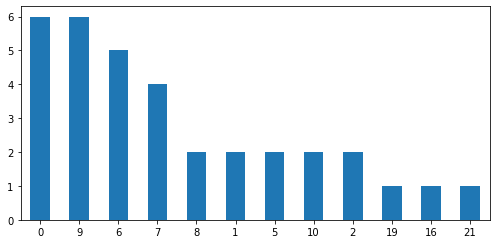

In [173]:
df_complete['time_to_completion'].value_counts().plot(kind='bar', rot=0)

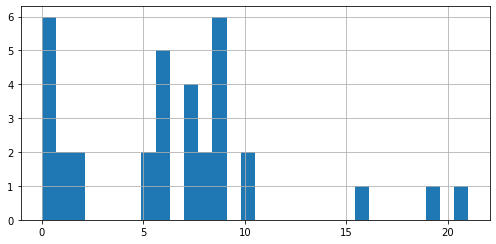

In [174]:
df_complete['time_to_completion'].hist(bins=30)
plt.show()

## IGNORE EVERYTHING ELSE BELOW AS THEY ARE EXPERIMENTAL

In [ ]:
gkk = df.groupby(['type3', 'project_num', 'tasks', 'task_num'])
gkk.first()

In [ ]:
gkk = df.groupby(['type3', 'project_num'])
gkk.first()

In [ ]:
# df.groupby("state")["last_name"].count()
df.groupby(['type3', 'project_num'])['tasks'].count()

In [ ]:
# Get the number of project_num / entries in each type3
df.groupby('type3')['project_num'].unique()

In [ ]:
df['type3'][df['tasks'] == 'name'].count()

In [ ]:
done1.loc[(done1['detail1']=='rewards') & (done1['detail2']=='amount')].value

In [ ]:
df[(df['detail1']=='assignees') & (df['detail2']=='username')& (df['value']=='Fabs')]

In [ ]:
df[(df['project_num']=='3') & (df['task_num']=='16')]

In [ ]:
# df['value'] = pd.to_numeric(df['value'])

In [ ]:
# import pandas as pd
# # df = pd.read_json('an-dao.json', orient='records', encoding="utf8")
# # df = pd.json_normalize('an-dao.json', 'projects', ['data', 'organization'])
# # df = pd.json_normalize('an-dao.json', 'submissions')
# df = pd.json_normalize(data, record_path=['submissions']) 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html
# df.locations = pd.DataFrame(df.slug.values.tolist())['name']
# df.head()